In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
haar_path = os.path.join('..', 'models', 'haarcascade_frontalface_default.xml')
cascade = cv2.CascadeClassifier(haar_path)

cap = cv2.VideoCapture(0)


def detect_face(frame, cascade):
    frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cascade.detectMultiScale(frame_g, 1.3, 5)
    if len(face) == 0:
        return frame, None
    
    x, y, w, h = face[0]
    
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    face_img = frame[y: y+h, x: x+w]
    return frame, face_img

img = cv2.imread('example_face.jpg')
frame, face = detect_face(img, cascade)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [3]:
i = 1

while True:
    _, frame = cap.read()
    frame, face_img = detect_face(frame, cascade)
    cv2.imshow('Output', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imshow('Photo', face_img)
        face_path = os.path.join('faces', f'img_{i}.jpg')
        face_img = cv2.resize(face_img, (480, 480))
        i += 1
        cv2.imwrite(face_path, face_img)
        
cap.release()
cv2.destroyAllWindows()

In [16]:
faces = []

for file in os.listdir('faces'):
    file_path = os.path.join('faces', file)
    if os.path.isfile(file_path):
        face_img = cv2.imread(file_path, 0)
        faces.append(face_img)
        
faces = np.array(faces)
labels = np.arange(len(faces))

model = cv2.face.LBPHFaceRecognizer_create()

model.train(faces, labels)

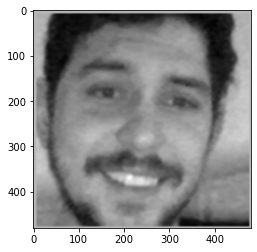

In [21]:
example = cv2.imread('faces/img_1.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
plt.imshow(example, cmap='gray')

In [22]:
model.predict(example)

(0, 0.16111576508857003)

In [23]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read() 
    cv2.imshow('Detector', frame)
    frame, faces = detect_face(frame, cascade)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()